In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
necoc = 100
generations = int(500/necoc)
generations

5

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, generations)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
import numpy as np
import random
while True:
    number_codes = []
    for i in range(2**(10-1), 2**10-1):
        for j in bin(i).split('b')[1]:
            number_codes.append(int(j))
    number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

    slice = random.sample(range(511), necoc)

    number_codes = number_codes[:,slice].tolist()

    classes = []
    for i in range(necoc):
        code_list = np.array(number_codes).T[i]
        classes.append(np.where(code_list==1)[0].tolist())

    matrix_errors = []

    for i in range(9):
        for j in range(i+1,10):
            matrix_errors.append(necoc - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
    min_error = np.min(matrix_errors)
    if min_error != 0:
        print(min_error)
        #print(number_codes)
        break

37


In [7]:
len(number_codes[0])

100

In [8]:
winner_list = []

for i,class1 in enumerate(classes):
    print("running:{}/100".format(i))
    winner = get_winner(class1)
    winner_list.append(winner)

running:0/100
number of class1:801
number of class2:816

 ****** Running generation 0 ****** 

Population's average fitness: 0.50434 stdev: 0.05710
Best fitness: 0.67285 - size: (2, 13) - species 2 - id 3
Average adjusted fitness: 0.169
Mean genetic distance 2.900, standard deviation 0.503
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 12.426 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53917 stdev: 0.06781
Best fitness: 0.76685 - size: (3, 15) - species 2 - id 263
Average adjusted fitness: 0.146
Mean genetic distance 2.982, standard deviation 0.490
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 13.294 sec (12.860 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55152 stdev: 0.07780
Best fitness: 0.76685 - size: (3, 15) - species 6 - id 263
Average adjusted fitness: 0.188
Mean genetic distance 3.044, standard deviation 0.472
Population of 200 members in 32 species


Mean genetic distance 3.008, standard deviation 0.468
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 14.632 sec (13.642 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.63940 stdev: 0.13352
Best fitness: 0.78479 - size: (3, 14) - species 5 - id 383
Average adjusted fitness: 0.321
Mean genetic distance 2.993, standard deviation 0.478
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 14.654 sec (13.845 average)
running:5/100
number of class1:650
number of class2:967

 ****** Running generation 0 ****** 

Population's average fitness: 0.51351 stdev: 0.07847
Best fitness: 0.70439 - size: (2, 13) - species 4 - id 24
Average adjusted fitness: 0.162
Mean genetic distance 2.906, standard deviation 0.480
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 12.762 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56419 stdev: 0.07815
Best fitness: 0.70439 - 

Population's average fitness: 0.54896 stdev: 0.08025
Best fitness: 0.76623 - size: (2, 13) - species 26 - id 113
Average adjusted fitness: 0.217
Mean genetic distance 3.067, standard deviation 0.495
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 15.504 sec (14.248 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56627 stdev: 0.09260
Best fitness: 0.83921 - size: (3, 15) - species 9 - id 674
Average adjusted fitness: 0.206
Mean genetic distance 3.115, standard deviation 0.494
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 15.562 sec (14.576 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57545 stdev: 0.09242
Best fitness: 0.83921 - size: (3, 15) - species 9 - id 674
Average adjusted fitness: 0.250
Mean genetic distance 3.152, standard deviation 0.493
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 15.759 sec (14.813 average)
running:1

Population of 201 members in 22 species
Total extinctions: 0
Generation time: 12.600 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52854 stdev: 0.06460
Best fitness: 0.75819 - size: (2, 14) - species 3 - id 369
Average adjusted fitness: 0.160
Mean genetic distance 3.018, standard deviation 0.485
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 13.754 sec (13.177 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54404 stdev: 0.06631
Best fitness: 0.75819 - size: (2, 14) - species 3 - id 369
Average adjusted fitness: 0.158
Mean genetic distance 3.049, standard deviation 0.494
Population of 204 members in 28 species
Total extinctions: 0
Generation time: 14.383 sec (13.579 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55135 stdev: 0.07228
Best fitness: 0.75819 - size: (2, 14) - species 3 - id 369
Average adjusted fitness: 0.188
Mean genetic distance 3.054, standard devi

Mean genetic distance 3.093, standard deviation 0.486
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 15.207 sec (14.227 average)
running:19/100
number of class1:1288
number of class2:329

 ****** Running generation 0 ****** 

Population's average fitness: 0.43940 stdev: 0.20522
Best fitness: 0.82560 - size: (2, 13) - species 6 - id 158
Average adjusted fitness: 0.275
Mean genetic distance 2.903, standard deviation 0.475
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 12.674 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56037 stdev: 0.21071
Best fitness: 0.83612 - size: (3, 15) - species 1 - id 380
Average adjusted fitness: 0.385
Mean genetic distance 3.046, standard deviation 0.463
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 13.842 sec (13.258 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62255 stdev: 0.21413
Best fitness: 0.83612

Population's average fitness: 0.56707 stdev: 0.09900
Best fitness: 0.76376 - size: (4, 17) - species 19 - id 498
Average adjusted fitness: 0.240
Mean genetic distance 3.145, standard deviation 0.518
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 14.717 sec (13.922 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57872 stdev: 0.10012
Best fitness: 0.76376 - size: (4, 17) - species 34 - id 498
Average adjusted fitness: 0.318
Mean genetic distance 3.197, standard deviation 0.515
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 16.561 sec (14.450 average)
running:24/100
number of class1:972
number of class2:645

 ****** Running generation 0 ****** 

Population's average fitness: 0.47658 stdev: 0.09163
Best fitness: 0.68893 - size: (2, 13) - species 8 - id 185
Average adjusted fitness: 0.221
Mean genetic distance 2.959, standard deviation 0.467
Population of 199 members in 28 species
Total extinctions

Mean genetic distance 2.953, standard deviation 0.466
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 15.358 sec (14.795 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56634 stdev: 0.08929
Best fitness: 0.74521 - size: (4, 16) - species 10 - id 469
Average adjusted fitness: 0.233
Mean genetic distance 3.024, standard deviation 0.458
Population of 206 members in 34 species
Total extinctions: 0
Generation time: 15.662 sec (15.084 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57355 stdev: 0.08676
Best fitness: 0.77551 - size: (4, 16) - species 10 - id 687
Average adjusted fitness: 0.225
Mean genetic distance 3.081, standard deviation 0.456
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 16.802 sec (15.514 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58948 stdev: 0.08504
Best fitness: 0.77551 - size: (4, 16) - species 10 - id 687



Population's average fitness: 0.47746 stdev: 0.09147
Best fitness: 0.74150 - size: (2, 13) - species 2 - id 28
Average adjusted fitness: 0.197
Mean genetic distance 2.937, standard deviation 0.474
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 13.815 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53824 stdev: 0.09584
Best fitness: 0.76623 - size: (3, 15) - species 23 - id 355
Average adjusted fitness: 0.233
Mean genetic distance 3.040, standard deviation 0.506
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 14.667 sec (14.241 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55729 stdev: 0.09639
Best fitness: 0.76623 - size: (3, 15) - species 23 - id 355
Average adjusted fitness: 0.230
Mean genetic distance 3.129, standard deviation 0.523
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 15.393 sec (14.625 average)

 ****** Running generati

Population's average fitness: 0.55155 stdev: 0.05885
Best fitness: 0.68769 - size: (5, 20) - species 2 - id 687
Average adjusted fitness: 0.134
Mean genetic distance 3.056, standard deviation 0.502
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 16.334 sec (15.372 average)
running:38/100
number of class1:970
number of class2:647

 ****** Running generation 0 ****** 

Population's average fitness: 0.47417 stdev: 0.09602
Best fitness: 0.70254 - size: (2, 13) - species 1 - id 110
Average adjusted fitness: 0.209
Mean genetic distance 2.946, standard deviation 0.517
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 14.053 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53675 stdev: 0.09251
Best fitness: 0.73840 - size: (2, 13) - species 3 - id 325
Average adjusted fitness: 0.204
Mean genetic distance 3.062, standard deviation 0.501
Population of 201 members in 31 species
Total extinctions: 0
Generation time

Mean genetic distance 3.056, standard deviation 0.477
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 15.647 sec (14.778 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.67901 stdev: 0.17783
Best fitness: 0.84045 - size: (4, 16) - species 23 - id 684
Average adjusted fitness: 0.442
Mean genetic distance 3.108, standard deviation 0.483
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 16.129 sec (15.116 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.65920 stdev: 0.20576
Best fitness: 0.84045 - size: (4, 16) - species 23 - id 684
Average adjusted fitness: 0.442
Mean genetic distance 3.107, standard deviation 0.483
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 16.426 sec (15.378 average)
running:43/100
number of class1:1139
number of class2:478

 ****** Running generation 0 ****** 

Population's average fitness: 0.45989 stdev: 0.14244
Be

Population's average fitness: 0.56622 stdev: 0.15512
Best fitness: 0.76994 - size: (2, 13) - species 2 - id 59
Average adjusted fitness: 0.306
Mean genetic distance 3.089, standard deviation 0.500
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 14.836 sec (14.339 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59197 stdev: 0.14986
Best fitness: 0.80025 - size: (4, 17) - species 4 - id 513
Average adjusted fitness: 0.342
Mean genetic distance 3.130, standard deviation 0.489
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 15.405 sec (14.694 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.60562 stdev: 0.14939
Best fitness: 0.80025 - size: (4, 17) - species 4 - id 513
Average adjusted fitness: 0.284
Mean genetic distance 3.132, standard deviation 0.479
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 16.259 sec (15.085 average)

 ****** Ru

Mean genetic distance 3.135, standard deviation 0.466
Population of 207 members in 42 species
Total extinctions: 0
Generation time: 16.712 sec (15.506 average)
running:52/100
number of class1:973
number of class2:644

 ****** Running generation 0 ****** 

Population's average fitness: 0.47939 stdev: 0.09190
Best fitness: 0.71985 - size: (2, 13) - species 2 - id 32
Average adjusted fitness: 0.202
Mean genetic distance 3.022, standard deviation 0.511
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 13.953 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53174 stdev: 0.08702
Best fitness: 0.71985 - size: (2, 13) - species 2 - id 32
Average adjusted fitness: 0.199
Mean genetic distance 3.126, standard deviation 0.499
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 14.915 sec (14.434 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55822 stdev: 0.08825
Best fitness: 0.74830 - 

Population's average fitness: 0.58105 stdev: 0.09181
Best fitness: 0.77922 - size: (3, 18) - species 5 - id 694
Average adjusted fitness: 0.267
Mean genetic distance 3.135, standard deviation 0.495
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 16.495 sec (15.343 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58489 stdev: 0.10158
Best fitness: 0.77922 - size: (3, 18) - species 5 - id 694
Average adjusted fitness: 0.253
Mean genetic distance 3.189, standard deviation 0.488
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 17.098 sec (15.694 average)
running:57/100
number of class1:971
number of class2:646

 ****** Running generation 0 ****** 

Population's average fitness: 0.48211 stdev: 0.08193
Best fitness: 0.67656 - size: (2, 13) - species 4 - id 26
Average adjusted fitness: 0.171
Mean genetic distance 2.905, standard deviation 0.489
Population of 200 members in 25 species
Total extinctions: 0

Mean genetic distance 3.004, standard deviation 0.464
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 14.783 sec (14.426 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53907 stdev: 0.06336
Best fitness: 0.70315 - size: (4, 15) - species 17 - id 508
Average adjusted fitness: 0.166
Mean genetic distance 2.995, standard deviation 0.488
Population of 206 members in 30 species
Total extinctions: 0
Generation time: 15.854 sec (14.902 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55396 stdev: 0.07133
Best fitness: 0.72604 - size: (3, 16) - species 6 - id 582
Average adjusted fitness: 0.165
Mean genetic distance 2.999, standard deviation 0.494
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 16.523 sec (15.307 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.55887 stdev: 0.07085
Best fitness: 0.72604 - size: (3, 16) - species 6 - id 582
Av


 ****** Running generation 0 ****** 

Population's average fitness: 0.47480 stdev: 0.15275
Best fitness: 0.76685 - size: (2, 13) - species 4 - id 176
Average adjusted fitness: 0.276
Mean genetic distance 2.976, standard deviation 0.507
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 13.971 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56779 stdev: 0.14548
Best fitness: 0.82498 - size: (2, 14) - species 24 - id 357
Average adjusted fitness: 0.265
Mean genetic distance 3.037, standard deviation 0.492
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 14.835 sec (14.403 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57936 stdev: 0.15654
Best fitness: 0.82498 - size: (2, 14) - species 24 - id 357
Average adjusted fitness: 0.312
Mean genetic distance 3.040, standard deviation 0.496
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 15.611 sec (14

Mean genetic distance 3.165, standard deviation 0.501
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 16.352 sec (15.312 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58651 stdev: 0.09946
Best fitness: 0.81385 - size: (2, 14) - species 32 - id 816
Average adjusted fitness: 0.192
Mean genetic distance 3.172, standard deviation 0.512
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 17.143 sec (15.678 average)
running:71/100
number of class1:479
number of class2:1138

 ****** Running generation 0 ****** 

Population's average fitness: 0.54244 stdev: 0.14226
Best fitness: 0.74273 - size: (2, 13) - species 2 - id 92
Average adjusted fitness: 0.265
Mean genetic distance 2.940, standard deviation 0.492
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 14.231 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59704 stdev: 0.13960
Best fitness: 0.80396

Population's average fitness: 0.55474 stdev: 0.08520
Best fitness: 0.77427 - size: (2, 13) - species 29 - id 62
Average adjusted fitness: 0.182
Mean genetic distance 3.071, standard deviation 0.457
Population of 207 members in 42 species
Total extinctions: 0
Generation time: 16.315 sec (15.151 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56187 stdev: 0.08511
Best fitness: 0.77427 - size: (2, 13) - species 29 - id 62
Average adjusted fitness: 0.188
Mean genetic distance 3.135, standard deviation 0.462
Population of 210 members in 42 species
Total extinctions: 0
Generation time: 16.808 sec (15.565 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56754 stdev: 0.08729
Best fitness: 0.77427 - size: (2, 13) - species 29 - id 62
Average adjusted fitness: 0.197
Mean genetic distance 3.077, standard deviation 0.464
Population of 206 members in 44 species
Total extinctions: 0
Generation time: 17.193 sec (15.891 average)
running:76

Mean genetic distance 2.961, standard deviation 0.488
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 14.234 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55383 stdev: 0.08399
Best fitness: 0.68584 - size: (3, 15) - species 6 - id 327
Average adjusted fitness: 0.234
Mean genetic distance 3.019, standard deviation 0.509
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 15.059 sec (14.647 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56275 stdev: 0.08458
Best fitness: 0.68584 - size: (3, 15) - species 6 - id 327
Average adjusted fitness: 0.214
Mean genetic distance 3.098, standard deviation 0.490
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 14.728 sec (14.674 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55836 stdev: 0.09258
Best fitness: 0.70377 - size: (4, 15) - species 3 - id 643
Average adjusted fit

Population's average fitness: 0.69026 stdev: 0.17882
Best fitness: 0.81200 - size: (3, 13) - species 34 - id 640
Average adjusted fitness: 0.475
Mean genetic distance 3.102, standard deviation 0.454
Population of 200 members in 44 species
Total extinctions: 0
Generation time: 14.388 sec (13.404 average)
running:85/100
number of class1:1292
number of class2:325

 ****** Running generation 0 ****** 

Population's average fitness: 0.44768 stdev: 0.21162
Best fitness: 0.81818 - size: (2, 13) - species 5 - id 62
Average adjusted fitness: 0.284
Mean genetic distance 2.970, standard deviation 0.504
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 12.127 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58680 stdev: 0.20432
Best fitness: 0.82127 - size: (3, 15) - species 2 - id 281
Average adjusted fitness: 0.389
Mean genetic distance 3.113, standard deviation 0.517
Population of 201 members in 34 species
Total extinctions: 0
Generation tim

Mean genetic distance 3.087, standard deviation 0.490
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 13.423 sec (12.930 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57808 stdev: 0.08590
Best fitness: 0.75325 - size: (2, 14) - species 10 - id 242
Average adjusted fitness: 0.195
Mean genetic distance 3.092, standard deviation 0.502
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 13.794 sec (13.146 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58780 stdev: 0.08306
Best fitness: 0.78912 - size: (3, 16) - species 10 - id 781
Average adjusted fitness: 0.199
Mean genetic distance 3.125, standard deviation 0.505
Population of 204 members in 42 species
Total extinctions: 0
Generation time: 14.256 sec (13.368 average)
running:90/100
number of class1:808
number of class2:809

 ****** Running generation 0 ****** 

Population's average fitness: 0.50452 stdev: 0.06056
Bes

Population of 200 members in 22 species
Total extinctions: 0
Generation time: 12.552 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53235 stdev: 0.07683
Best fitness: 0.70315 - size: (2, 13) - species 1 - id 16
Average adjusted fitness: 0.191
Mean genetic distance 2.965, standard deviation 0.475
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 13.035 sec (12.794 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54571 stdev: 0.07804
Best fitness: 0.72789 - size: (3, 15) - species 11 - id 505
Average adjusted fitness: 0.200
Mean genetic distance 3.020, standard deviation 0.487
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 13.364 sec (12.984 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56736 stdev: 0.08375
Best fitness: 0.72789 - size: (3, 15) - species 11 - id 505
Average adjusted fitness: 0.168
Mean genetic distance 3.097, standard dev

Mean genetic distance 3.085, standard deviation 0.522
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 14.971 sec (13.730 average)
running:99/100
number of class1:1132
number of class2:485

 ****** Running generation 0 ****** 

Population's average fitness: 0.45644 stdev: 0.14088
Best fitness: 0.75201 - size: (2, 13) - species 3 - id 141
Average adjusted fitness: 0.171
Mean genetic distance 2.888, standard deviation 0.481
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 12.579 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55982 stdev: 0.14825
Best fitness: 0.76129 - size: (2, 13) - species 2 - id 342
Average adjusted fitness: 0.283
Mean genetic distance 3.046, standard deviation 0.496
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 13.422 sec (13.000 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61107 stdev: 0.11986
Best fitness: 0.76129

In [9]:
len(winner_list)

100

In [10]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [11]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [12]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(necoc - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.7722222222222223

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  1]
 [ 0  7  0  1  0  0  1  0  1  0]
 [ 0  0 14  0  0  0  0  0  1  0]
 [ 0  0  2  9  0  0  0  0  0  0]
 [ 0  6  0  0 18  0  1  1  4  0]
 [ 0  1  0  4  2 18  0  0  0  3]
 [ 0  0  0  1  0  0 16  0  0  0]
 [ 0  0  0  1  0  0  0 18  1  0]
 [ 0  5  1  2  0  0  0  0 10  1]
 [ 0  0  0  0  0  0  0  0  0 13]]


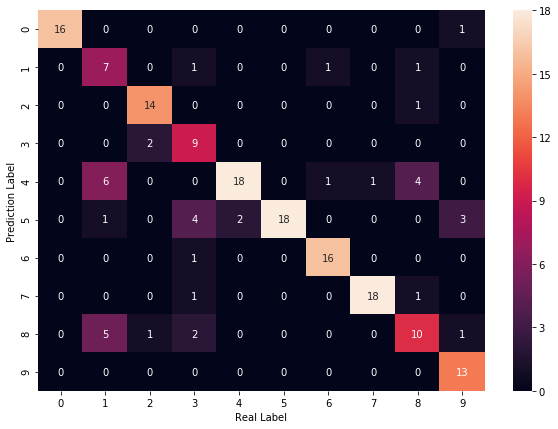

In [14]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [15]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:25 index:[5] real:5
#1 min_error:28 index:[3] real:2
#2 min_error:27 index:[1] real:8
#3 min_error:12 index:[0] real:0
#4 min_error:28 index:[1] real:1
#5 min_error:20 index:[7] real:7
#6 min_error:24 index:[6] real:6
#7 min_error:26 index:[3] real:3
#8 min_error:22 index:[2] real:2
#9 min_error:33 index:[1] real:1
#10 min_error:29 index:[7] real:7
#11 min_error:32 index:[5] real:4
#12 min_error:25 index:[6] real:6
#13 min_error:26 index:[3] real:3
#14 min_error:27 index:[1] real:1
#15 min_error:34 index:[1] real:3
#16 min_error:23 index:[5] real:9
#17 min_error:28 index:[1] real:1
#18 min_error:26 index:[7] real:7
#19 min_error:20 index:[6] real:6
#20 min_error:29 index:[4] real:8
#21 min_error:18 index:[4] real:4
#22 min_error:23 index:[3] real:3
#23 min_error:33 index:[1] real:1
#24 min_error:18 index:[4] real:4
#25 min_error:14 index:[0] real:0
#26 min_error:14 index:[5] real:5
#27 min_error:23 index:[3] real:3
#28 min_error:32 index:[1] real:6
#29 min_error:26 index:[

In [16]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.8484848484848485
Avg Base Learner:0.7735374149659863


In [17]:
from random import randint

list_acc = []

for iii in range(necoc):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    #print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

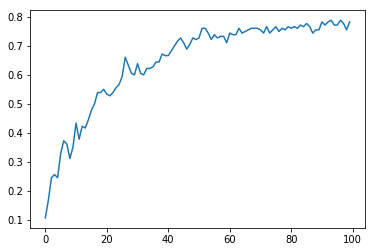

In [18]:
plt.plot(range(necoc),list_acc)
plt.show()

In [19]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(2)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []

for winner in winner_list:
    used_nodes = list(winner.nodes.keys())
    # create a dict for mapping 
    l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))

    ### 将节点加入图
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in winner.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

    v = numbers
    list_connections = []
    for vi in v:
        for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
            list_connections.append(g.isReachable(u, vi))

    nodes_inputs = range(number_of_classification, number_of_classification+ 64)
    nodes_outputs = range(number_of_classification)
    nodes_mid = range(number_of_classification + 64, len(dict_nodes))

    # 找到所有输入和输出连接的路
    all_path = []
    for u in nodes_inputs:
        for v in nodes_outputs:
            path = findAllPath(g.graph, u, v)
            if path:
                all_path = all_path + path

    # 得到最长路，以及每个节点在哪个层级
    max_length = max([len(x) for x in all_path])
    nodes_tuples_list = []
    for path in all_path:
        #print(path)
        for node in path:
            nodes_tuples_list.append([node, path.index(node)])

    # 确定节点的层级（消除重复）       
    nodes_tuples_fixed_list = []
    for index in range(max_length):
        for nodes in nodes_tuples_list:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                if nodes not in nodes_tuples_fixed_list:
                    nodes_tuples_fixed_list.append(nodes)


    # 所有有连接的节点
    all_used_nodes = []
    for node in nodes_tuples_fixed_list:
        if node[0] not in all_used_nodes:
            all_used_nodes.append(node[0])

    # 确定节点的层级（最终确定）
    nodes_tuples_fixed_list_final = []

    for node in all_used_nodes:
        if node in nodes_inputs:
            nodes_tuples_fixed_list_final.append([node, 0])
        elif node in nodes_outputs:
            nodes_tuples_fixed_list_final.append([node, max_length - 1])
        else:
            list_node = []
            for nodes in nodes_tuples_fixed_list:
                if node == nodes[0]:
                    list_node.append(nodes)
            layer = 0
            for ele in list_node:
                # 删除重复项，取最大
                if ele[1] > layer:
                    layer = ele[1]
            nodes_tuples_fixed_list_final.append([node,layer])


    # 每个层级的节点合数
    length_of_layers = []
    number_of_nodes = 0
    for index in range(max_length):
        for nodes in nodes_tuples_fixed_list_final:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                number_of_nodes += 1
        length_of_layers.append(number_of_nodes)

    length_of_each_layer = []
    length_of_each_layer.append(length_of_layers[0])
    for i in range(1, max_length):
        length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

    # 输出每个层级的节点个数
    #print("length of each layers:", length_of_each_layer)

    # 所有端到端的路
    all_path_side2side = []
    for path in all_path:
        if len(path) == 2:
            all_path_side2side.append(path)
        else:
            for i in range(len(path)-1):
                all_path_side2side.append([path[i],path[i+1]])

    # 定义节点到绘图的字典
    dict_nodes_graph = dict()
    count_number_layer = [0] * max_length
    for nodes in nodes_tuples_fixed_list_final:
        node, layer = nodes
        dict_nodes_graph[node] = [count_number_layer[layer], layer]
        count_number_layer[layer] += 1
    list_nodes_number.append(np.sum(length_of_each_layer))
    list_connection_number.append(len(all_path_side2side))
    #print("Number of nodes:{} Number of connections:{}".format(np.sum(length_of_each_layer),len(all_path_side2side)))
print("Total nodes:{} Total connections::{}".format(np.sum(list_nodes_number), np.sum(list_connection_number)))

Total nodes:1648 Total connections::1593


In [20]:
a =  - np.log(0.8)
a

0.2231435513142097

In [21]:
1 -a

0.7768564486857903